<a href="https://colab.research.google.com/github/BrunoCapron/ESQ724-fundamentos_aprendizado_maquina/blob/main/Aprendizado_Supervisionado/k-nearest_neighbors/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparação treino baseado em modelo com treino baseado em instâncias

Para ilustração, usamos dados de satisfação de vida de população de países em função do PIB

In [22]:
!curl -O https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/oecd_bli_2015.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  395k  100  395k    0     0  1333k      0 --:--:-- --:--:-- --:--:-- 1337k


In [23]:
!curl -O https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/gdp_per_capita.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36323  100 36323    0     0  96312      0 --:--:-- --:--:-- --:--:-- 96347


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Carregamos os dados
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")




In [29]:
import pandas as pd

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [30]:
#preparamos os dados de treino
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]



In [31]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [37]:
X, y

(array([[ 9054.914],
        [ 9437.372],
        [12239.894],
        [12495.334],
        [15991.736],
        [17288.083],
        [18064.288],
        [19121.592],
        [20732.482],
        [25864.721],
        [27195.197],
        [29866.581],
        [32485.545],
        [35343.336],
        [37044.891],
        [37675.006],
        [40106.632],
        [40996.511],
        [41973.988],
        [43331.961],
        [43603.115],
        [43724.031],
        [43770.688],
        [49866.266],
        [50854.583],
        [50961.865],
        [51350.744],
        [52114.165],
        [55805.204]]),
 array([[6. ],
        [5.6],
        [4.9],
        [5.8],
        [6.1],
        [5.6],
        [4.8],
        [5.1],
        [5.7],
        [6.5],
        [5.8],
        [6. ],
        [5.9],
        [7.4],
        [7.3],
        [6.5],
        [6.9],
        [7. ],
        [7.4],
        [7.3],
        [7.3],
        [6.9],
        [6.8],
        [7.2],
        [7.5],
        [7.3],

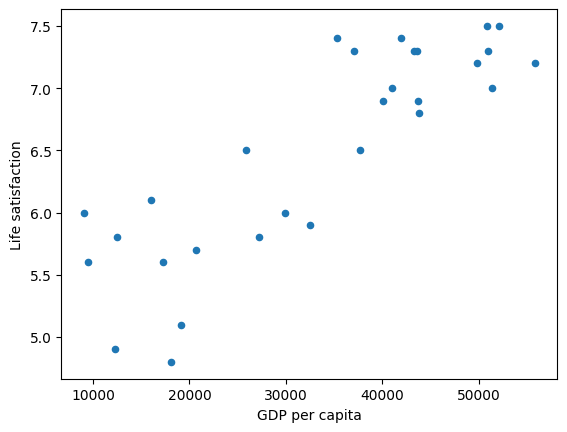

In [38]:
#Vizualizando os dados
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

#treino baseado em modelo (modelo linear)

In [39]:
#selecionando o modelo
model = sklearn.linear_model.LinearRegression()

# treinando o modelo
model.fit(X, y)

#Fazendo uma predição para Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new))




[[5.96242338]]


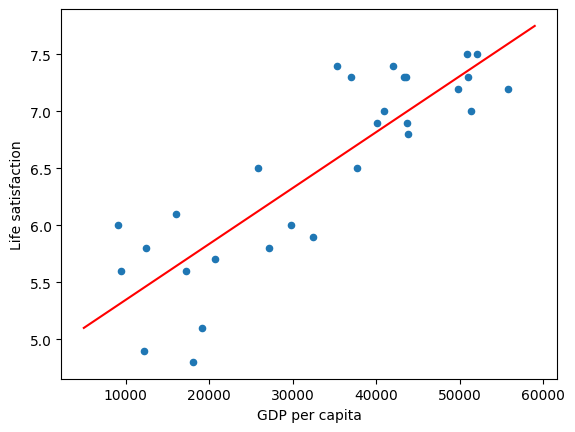

In [35]:
#Vizualizando as predições feitas pelo modelo
X_model = np.arange(5000, 60000, 1000)
y_model = model.predict(X_model.reshape(-1, 1)) #.reshape(-1,1) transforma em vetor coluna

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.plot(X_model, y_model, "r-")

treino baseado em instância (K_nearest_neighbors)

In [36]:
import sklearn.neighbors

knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X, y)

#Fazendo uma predição para Cyprus
print(knn_model.predict(X_new))

[[5.76666667]]
